In [12]:
#default_exp utils

# Plotting and Viz Utils

In [13]:
#export
import numpy as np
import torch
from matplotlib import cm
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from fastcore.all import *

In [14]:
#export
def _scale_image(img:np.ndarray, high=1.):
    return (img-img.min())/(img.max()-img.min())*high

def _format_tensor_array(im):
    # Handle pytorch axis order
    if isinstance(im, torch.Tensor):
        im = im.cpu()
        im = im.permute(1,2,0)
    elif not isinstance(im,np.ndarray): 
        im = np.array(im)
    # Handle 1-channel images
    if im.shape[-1]==1: 
        im = im[...,0]
    return im

In [15]:
image_array = np.random.random((20,20,3))
out = _format_tensor_array(image_array)
test_eq(out.shape, (20,20,3))

image_array2 = torch.rand(3,20,20)
out = _format_tensor_array(image_array2)
test_eq(out.shape, (20,20,3))

image_1_channel = torch.rand(1,20,20)
out = _format_tensor_array(image_1_channel)
test_eq(out.shape, (20,20))

In [16]:
#export
def to_viridis(tensor_image):
    image_array = _format_tensor_array(tensor_image)
    image_array = _scale_image(image_array, high=1)
    return Image.fromarray(np.uint8(cm.viridis(image_array)*255))

Let's do some testing

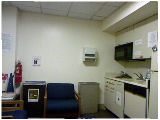

In [17]:
pil_img = Image.open("images/img.png")
pil_img

In [18]:
image_array = np.array(pil_img)
b_channel_array = image_array[:,:,-1:]

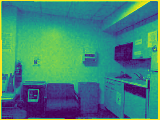

In [19]:
to_viridis(b_channel_array)

In [20]:
#export

# This comes from fastai.torch_core

def _fig_bounds(x):
    r = x//32
    return min(5, max(1,r))

@delegates(plt.Axes.imshow, keep=True, but=['shape', 'imlim'])
def show_image(im, ax=None, figsize=None, title=None, ctx=None, **kwargs):
    "Show a PIL or PyTorch image on `ax`."
    im = _format_tensor_array(im)

    ax = ifnone(ax,ctx)
    if figsize is None: figsize = (_fig_bounds(im.shape[0]), _fig_bounds(im.shape[1]))
    if ax is None: _,ax = plt.subplots(figsize=figsize)
    ax.imshow(im, **kwargs)
    if title is not None: ax.set_title(title)
    ax.axis('off')
    return ax

@delegates(plt.subplots)
def show_images(ims, nrows=1, ncols=None, titles=None, **kwargs):
    "Show all images `ims` as subplots with `rows` using `titles`."
    if ncols is None: ncols = int(math.ceil(len(ims)/nrows))
    if titles is None: titles = [None]*len(ims)
    axs = plt.subplots(nrows, ncols, **kwargs)[1].flat
    for im,t,ax in zip(ims, titles, axs): show_image(im, ax=ax, title=t)

## Export -

In [21]:
from nbdev.export import notebook2script
notebook2script()

Converted 00_utils.ipynb.
Converted 01_data.ipynb.
Converted 02_layers.ipynb.
Converted 03_hydranet.ipynb.
Converted 04_trainer.ipynb.
